# Análise OD-2023

As seguintes análises foram feitas:
- Análise comparativa dos meios de transporte da OD 23 (quais os meios mais/menos utilizados) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.models import meios_transporte

In [2]:
data_path = "../data/OD/OD-2023/od23_all.csv"
df = pd.read_csv(data_path)
# df.columns

In [3]:
df.head()

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,TIPVG,TP_ESAUTO,VL_EST,PE_BICI,TP_ESTBICI,PROP_BICI,DISTANCIA,ID_ORDEM,HORA_SAIDA,HORA_CHEG
0,1,36,-23.550855,-46.629023,0,1,32.34,1,1,17/04/2024,...,4,0,0,7,2,1,1518.600013,1,11:00:00,11:30:00
1,1,36,-23.550855,-46.629023,100001,0,32.34,1,1,17/04/2024,...,4,0,0,9,2,1,1518.600013,2,15:30:00,16:00:00
2,1,36,-23.550855,-46.629023,100002,1,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,8350.069281,3,18:00:00,18:30:00
3,1,36,-23.550855,-46.629023,100002,0,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,8350.069281,4,23:00:00,23:25:00
4,1,36,-23.550855,-46.629023,100002,0,32.34,2,1,17/04/2024,...,2,0,0,0,0,0,10346.375791,5,13:00:00,13:30:00


## Comparação dos meios de transporte (OD-2023)

Colunas importantes:
- FE_PESS: fator de expansão da pessoa
- MODOPRIN: modo principal de viagem da pessoa

In [4]:
print(meios_transporte)

{1: 'Metrô', 2: 'Trem', 3: 'Monotrilho', 4: 'Ônibus/micro-ônibus/van do município de São Paulo', 5: 'Ônibus/micro-ônibus/van de outros municípios', 6: 'Ônibus/micro-ônibus/van metropolitano', 7: 'Transporte Fretado', 8: 'Transporte Escolar', 9: 'Dirigindo Automóvel', 10: 'Passageiro de Automóvel', 11: 'Táxi Convencional', 12: 'Táxi não Convencional / aplicativo', 13: 'Dirigindo Moto', 14: 'Passageiro de Moto', 15: 'Passageiro de Mototáxi', 16: 'Bicicleta', 17: 'A Pé', 18: 'Outros'}


In [5]:
meios_fatorexp = df.groupby('MODOPRIN')['FE_PESS'].sum()
meios_fatorexp = meios_fatorexp.sort_values()

In [6]:
meios_fatorexp.index = meios_fatorexp.index.map(lambda x: meios_transporte.get(x, "Desconhecido"))

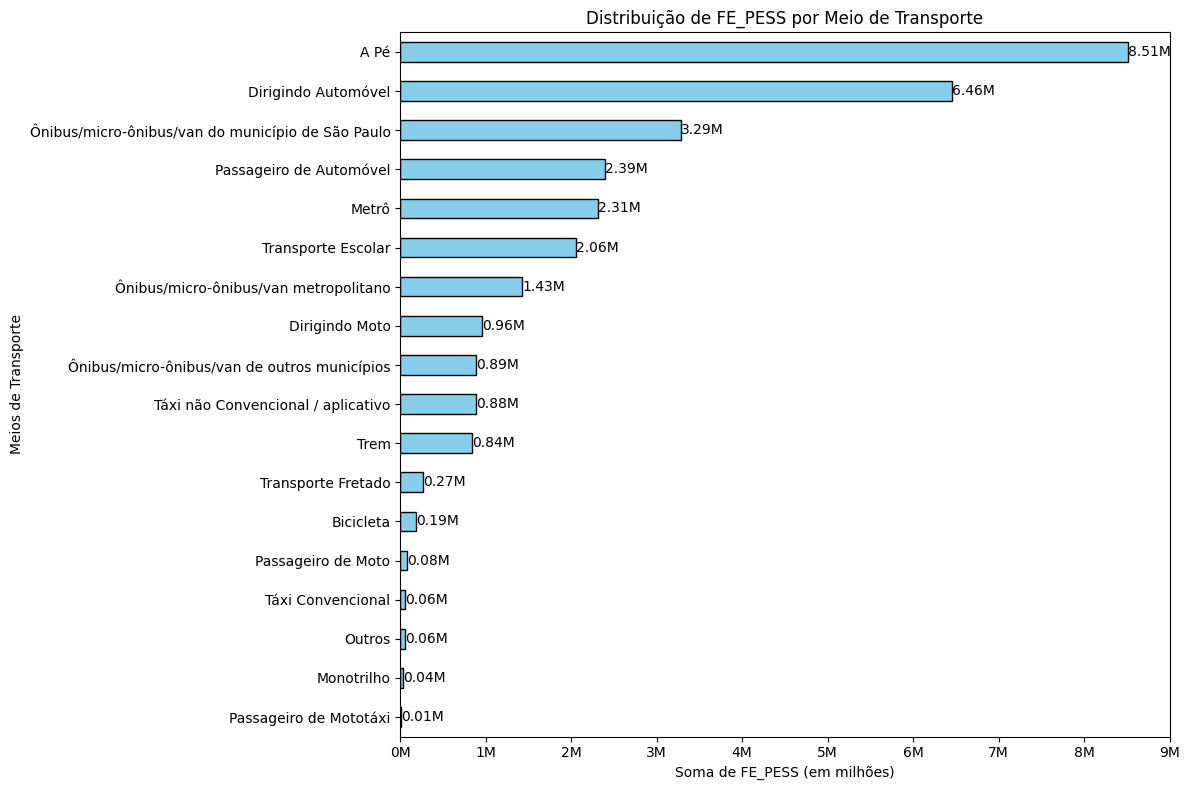

In [7]:
plt.figure(figsize=(12, 8))
meios_fatorexp.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Soma de FE_PESS (em milhões)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição de FE_PESS por Meio de Transporte')

for index, value in enumerate(meios_fatorexp):
    plt.text(value, index, f'{value/1e6:.2f}M', va='center')  

plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x/1e6)}M' for x in plt.xticks()[0]])

plt.tight_layout()  
plt.show()

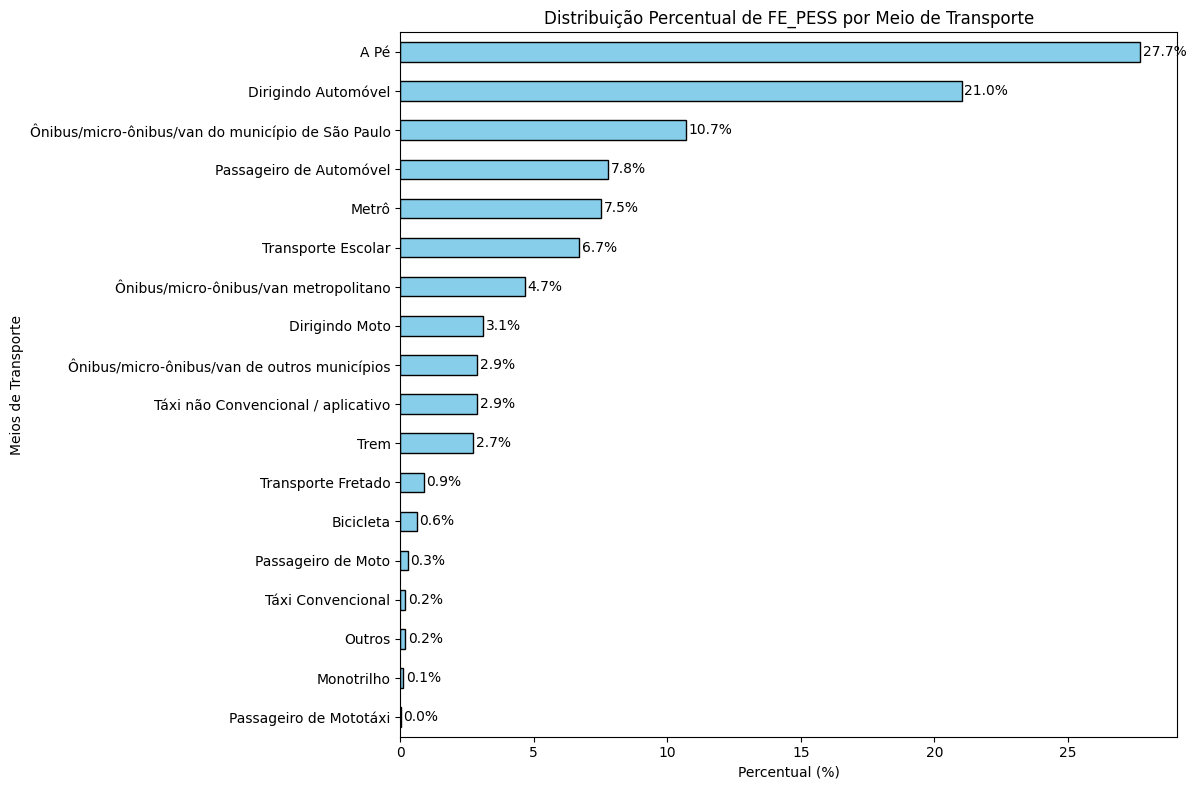

In [8]:
meios_fatorexp_normalizado = (meios_fatorexp / meios_fatorexp.sum()) * 100

plt.figure(figsize=(12, 8))
meios_fatorexp_normalizado.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Percentual (%)')
plt.ylabel('Meios de Transporte')
plt.title('Distribuição Percentual de FE_PESS por Meio de Transporte')

for index, value in enumerate(meios_fatorexp_normalizado):
    plt.text(value + 0.1, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

### Análise comparativa percentual entre os meios de transporte

Com os gráficos acima, observa-se que os meios de transporte mais utilizados são, em ordem decrescente: a pé, dirigindo automóvel, e ônibus(e derivados) do município de São Paulo.

- A pé - 27.7%
- Dirigindo automóvel - 21.0% 
- Ônibus(e derivados) do município de São Paulo - 10.7%

## Caracterização do Perfil do Pedestre

Colunas importantes:
- FE_PESS: fator expansão da pessoa ('peso da linha')
- MODOPRIN: modo principal
- IDADE
- SEXO
- ESTUDA
- GRAU_INS: grau de instrução
- CD_ATIVI: condição atividade (trabalho regular, bico...)
- VL_REN_I: valor da renda individual
- MOTIVO_D: motivo no destino
- PE_BICI: por que viajou a pé ou bicicleta
- DISTANCIA: distância da viagem em metros

Correlação entre variáveis

In [9]:
df[['IDADE', 'VL_REN_I', 'DISTANCIA', 'FE_PESS']].corr(method='pearson')

,IDADE,VL_REN_I,DISTANCIA,FE_PESS
IDADE,1.000000,0.319188,0.114859,-0.190730
VL_REN_I,0.319188,1.000000,0.073739,-0.155920
DISTANCIA,0.114859,0.073739,1.000000,0.042444
FE_PESS,-0.190730,-0.155920,0.042444,1.000000


In [ ]:
df[['IDADE', 'VL_REN_I', 'DISTANCIA', 'FE_PESS']].corr(method='spearman')

,IDADE,VL_REN_I,DISTANCIA,FE_PESS
IDADE,1.000000,0.631517,0.189024,-0.207185
VL_REN_I,0.631517,1.000000,0.301261,-0.203193
DISTANCIA,0.189024,0.301261,1.000000,0.008108
FE_PESS,-0.207185,-0.203193,0.008108,1.000000


Tabelas de contingência entre sexo e modo de transporte

In [12]:
pd.crosstab(df['SEXO'], df['MODOPRIN'], normalize='index')

MODOPRIN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
SEXO,,,,,,,,,,,,,,,,,,
1,0.077989,0.022077,0.000677,0.091014,0.017212,0.028313,0.008374,0.052242,0.305686,0.056501,0.00310,0.025818,0.048821,0.001800,0.000125,0.014361,0.243091,0.002797
2,0.087897,0.021851,0.000758,0.129555,0.026926,0.039790,0.004775,0.052689,0.186985,0.095087,0.00548,0.048848,0.004846,0.003084,0.000300,0.002890,0.287341,0.000899
3,0.047619,0.000000,0.000000,0.142857,0.000000,0.023810,0.000000,0.190476,0.095238,0.000000,0.00000,0.190476,0.000000,0.000000,0.000000,0.000000,0.309524,0.000000
